## Rainfall and Runoff

In this tutorial, we are going to visualize the relationship between the hyetogram and the hydrogram for the Sarine river, located in the canton of Fribourg.

First, we import the necessary modules from the `existenz_api_fetcher` package.

In [1]:
from existenz_api_fetcher import locations, meteo, hydro

In order to find out the MeteoSwiss station code for the city of Fribourg, we use the `locations` module.

In [2]:
locations.maps()

https://api-datasette.konzept.space/existenz-api/smn_locations
https://api-datasette.konzept.space/existenz-api/hydro_locations


We can now query the data with the `rainfall` and `flow` functions.

In [3]:
# Station code variables
h_station = '2119'
m_station = 'GRA'

# Rainfall dataframe
rain_df = meteo.rainfall(m_station)
# River flow dataframe
hydro_df = hydro.flow(h_station)

All is set! Let's visualize the data.

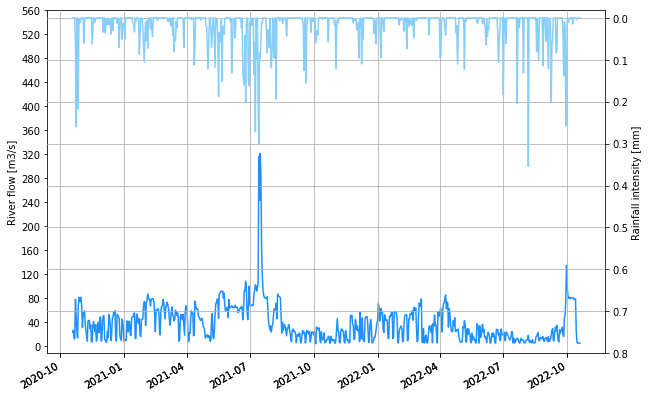

In [4]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

# Hydrogram
ax.plot(hydro_df['_value'], color="dodgerblue")
ax.set_ylabel("River flow [m3/s]")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_yticks(ticks=range(0, 600, 40), minor=False)

# Hyetogram
ax2.plot(rain_df['_value'], color="lightskyblue")
ax2.yaxis.tick_right()
ax2.set_ylabel("Rainfall intensity [mm]")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')
ax2.set_yticks(np.linspace(0, 0.8, 9), minor=False)
plt.gca().invert_yaxis()

fig.autofmt_xdate()
plt.grid('on')

# Save plot
# plt.savefig("Sarine.png")

plt.show()

We can easily notice the flood periods of summer 2021, more precisely during the months of june and july. The recent drought of summer 2022 is also visible on the hydrogram.